In [8]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [9]:
X =  [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
Y =  [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]

beta = 4

In [10]:
k=4
X_4 = np.array([[x**p for p in range(k+1)] for x in X])

Y = np.array(Y)
Y = Y.reshape(Y.shape[0],1)

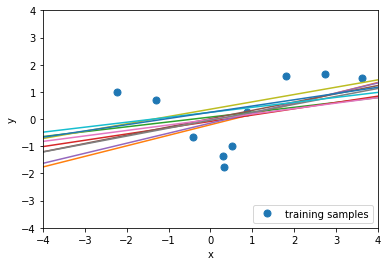

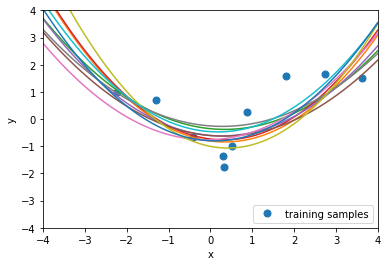

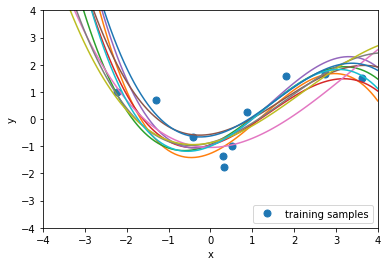

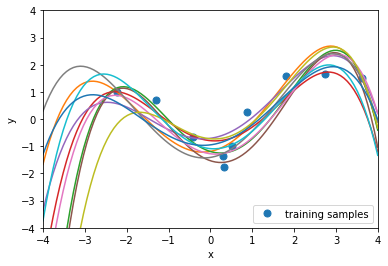

In [11]:
### 6.1

for k in range(1,5):
  X_k = X_4[:,:k+1].copy()
  
  mu_k = np.linalg.inv((X_k.T @ X_k) + (1/beta)) @ X_k.T @ Y
  cov_k = np.linalg.inv((beta * (X_k.T @ X_k) ) + 1)
  
  post_k = multivariate_normal(mu_k.reshape((mu_k.shape[0])),cov_k,allow_singular=True)
  ws = post_k.rvs(size=10, random_state=2021)

  x_plot = np.linspace(-4,4,100)
  x_plot_k = np.array([[x**p for p in range(k+1)] for x in x_plot])

  fig_k = plt.figure()
  plt.plot(X,Y,'o',markersize=7,label='training samples')
  plt.plot(x_plot,x_plot_k @ ws.T)
  plt.xlim((-4,4))
  plt.ylim((-4,4))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc='lower right')
  plt.show()

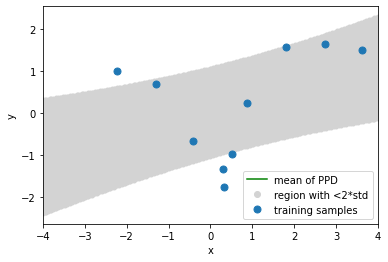

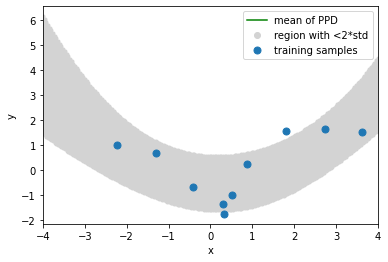

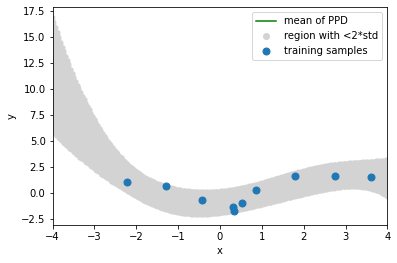

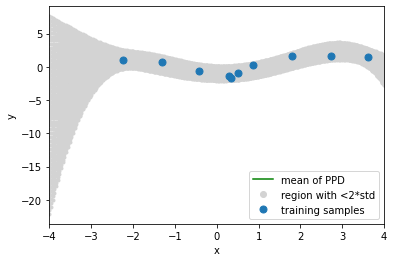

In [12]:
### 6.2

for k in range(1,5):
  X_k = X_4[:,:k+1].copy()
  
  mu_k = np.linalg.inv((X_k.T @ X_k) + (1/beta)) @ X_k.T @ Y
  cov_k = np.linalg.inv((beta * (X_k.T @ X_k) ) + 1)

  x_plot = np.linspace(-4,4,200)
  x_plot_k = np.array([[x**p for p in range(k+1)] for x in x_plot])

  pred_xk_mu = (x_plot_k @ mu_k).reshape((x_plot_k.shape[0]))
  pred_xk_std = np.sqrt((1/beta) + np.diag(x_plot_k @ cov_k @ x_plot_k.T))

  fig_k = plt.figure()
  plt.plot(x_plot,np.linspace(pred_xk_mu-(2*pred_xk_std), pred_xk_mu+(2*pred_xk_std), 50).T,'o',c='lightgray',markersize=3)
  plt.plot(x_plot,pred_xk_mu,c='green',label='mean of PPD')
  plt.plot(x_plot,pred_xk_mu,'o',c='lightgray',label='region with <2*std')
  plt.plot(X,Y,'o',markersize=7,label='training samples')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((-4,4))
  if k==2 or k==3: plt.legend(loc='upper right')
  else: plt.legend(loc='lower right')
  plt.show()



In [13]:
### 6.3

for k in range(1,5):
  X_k = X_4[:,:k+1].copy()

  ML_k_dist = multivariate_normal(np.zeros((X_k.shape[0])), ((1/beta)*np.identity(X_k.shape[0]))+(X_k @ X_k.T), allow_singular=True)
  
  MLL_k = np.log(ML_k_dist.pdf(Y.reshape(Y.shape[0])))
  print("k =",k,">> log marginal likelihood:", MLL_k)

k = 1 >> log marginal likelihood: -32.352015280445244
k = 2 >> log marginal likelihood: -22.77215317878222
k = 3 >> log marginal likelihood: -22.079070642234182
k = 4 >> log marginal likelihood: -22.386776180355803


In [14]:
### 6.4

for k in range(1,5):
  X_k = X_4[:,:k+1].copy()
  # print((1/beta)*np.identity(k+1))
  w_map = np.linalg.inv((X_k.T @ X_k) + ((1/beta)*np.identity(k+1))) @ X_k.T @ Y
  L_k_dist = multivariate_normal((X_k @ w_map).reshape((X_k.shape[0])), np.diag([1/beta]*X_k.shape[0]), allow_singular=True)
  
  LL_k = np.log(L_k_dist.pdf(Y.reshape(Y.shape[0])))
  print("k =",k,">> log likelihood:", LL_k)


k = 1 >> log likelihood: -28.094004379075553
k = 2 >> log likelihood: -15.360663659052214
k = 3 >> log likelihood: -10.935846883615739
k = 4 >> log likelihood: -7.225291259028603
